In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

In [2]:
folder = "./"
file = "case1_2L_0.dat"
binSize = 100

In [6]:
## triprate  
## foodCount 
## action Sequence
## Q table

In [3]:
def get_non_zero_files(folder):
    files=os.listdir(folder)
    for file in files:
        if os.path.getsize(folder+file) == 0:
            files.remove(file)
    return(files)

In [4]:
def load_pickle(file):
    fl=open(file,"rb+")
    return(pickle.load(fl))

In [5]:
def qKey_parser(q_table,numActions):
    new_q={}
    for key,value in q_table.items():
        if key[0] not in list(new_q.keys()):
            ac_q=[0]*7
            ac_q[key[1]] = value
            new_q[key[0]] = ac_q
        else:
            new_q[key[0]][key[1]]= value
    return(new_q)
    

In [6]:
def get_foodCount(data,binSize):
    fd=np.zeros(len(data["agents"][0]["food"]))
    for i in range(len(data["agents"])):
        fd += np.array(data["agents"][i]["food"])
    fd = fd/len(data["agents"])
    ind=range(0,fd.shape[0]+1,binSize)
    sm = [np.sum(fd[ind[i]:ind[i+1]]) for i in range(len(ind)-1)]
    return(sm)

In [7]:
def action_count(data,binSize):
    ac=np.zeros(len(data["agents"][0]["actions"]))
    ind=range(0,ac.shape[0]+1,binSize)
    num_actions=np.bincount(data["agents"][0]["actions"]).shape[0]
    actions=[]    
    for j in range(len(ind)-1):
        actionCount = np.zeros(num_actions)
        for i in range(len(data["agents"])):
            arr=np.array(data["agents"][i]["actions"][ind[j]:ind[j+1]])
            count= np.bincount(arr)
            if actionCount.shape[0]== count.shape[0]:
                actionCount += count
            else:
                actionCount[:count.shape[0]] += count
        actions.append(actionCount/len(data["agents"]))
    return(actions)

In [30]:
data=load_pickle("../data/1M/case_3/data2.pkl")
#actions=action_count(data,100)

In [31]:
np.unique(np.array(data["agents"][2]["actions"]))

array([0, 1, 2, 3, 4])

In [18]:
actions

[array([26.2, 20.2, 11.1,  5.2, 37.3]),
 array([23. , 16.2, 18.5, 17.2, 25.1]),
 array([20.5, 16.2, 29.6, 12.2, 21.5]),
 array([22.8, 19.3, 26.4, 14.8, 16.7]),
 array([30.2, 13.2, 30.2,  5.1, 21.3]),
 array([37.1, 10.1, 26.9, 10.2, 15.7]),
 array([31.9, 16.4, 29.9,  9.8, 12. ]),
 array([32.4,  9.4, 35.1,  9.6, 13.5]),
 array([25.6, 16.2, 29.3, 11.7, 17.2]),
 array([21.6, 20.9, 31.1,  9.4, 17. ]),
 array([24. , 18.3, 29.7,  9.7, 18.3]),
 array([24.3, 16.7, 32.7, 10.8, 15.5]),
 array([27.3,  9.7, 30.5, 13.5, 19. ]),
 array([21.9, 10.9, 30.8, 17.5, 18.9]),
 array([23.9, 12.8, 26.2, 16.5, 20.6]),
 array([19.3, 14.4, 31.1, 16.1, 19.1]),
 array([27.1, 14.7, 25.1, 13.9, 19.2]),
 array([20.8, 17.4, 28.7, 14.8, 18.3]),
 array([21.8, 19.7, 21.1, 16.6, 20.8]),
 array([18.8, 20.4, 26.5, 16.8, 17.5]),
 array([21.9, 22.8, 23.7, 15. , 16.6]),
 array([21.7, 23.7, 26.3, 12.9, 15.4]),
 array([20.3, 18.2, 28.6, 17.4, 15.5]),
 array([21.7, 21.8, 30.6, 12. , 13.9]),
 array([28. , 29.2, 23.4, 10.4,  9. ]),


In [8]:
def plot_stackPlot(df,binSize,is_legend=True,ax = None):
    if ax == None:
        ax = plt
    x = np.array(list(range(df.shape[0])))*binSize
    labels = ["Drop Home Pher",
              "Drop Target Pher", "Follow Home Pher", 
              "Follow Target Pher", "Move Randomly", "Trace A", "Trace B"]
    colors = ["m", "c", "chartreuse", "r", "b", "y", "g"]
    if df.shape[1] ==7:
        ax.stackplot(x,df[0].values, df[1].values,df[2].values,df[3].values,df[4].values,df[5].values,df[6].values,labels=labels,colors=colors)
    elif df.shape[1]==5:
        ax.stackplot(x,df[0].values, df[1].values,df[2].values,df[3].values,df[4].values,labels=labels,colors=colors)

    if is_legend:
        #ax.legend(bbox_to_anchor=(0., -0.2, 0.1, .102), loc=0,ncol=2, mode="expand", borderaxespad=0.,fontsize=20)
        ax.legend(bbox_to_anchor=(1, -0.3),loc=0,ncol=3)
        #bbox_to_anchor=(0.5, -0.5), 




In [9]:
def get_food_collection_from_folder(folder,binSize,numFiles=None):
    files=os.listdir(folder)
    for file in files:
        if os.path.getsize(folder+file) == 0:
            files.remove(file)
    data=load_pickle(folder+files[0])
    food=np.array(get_foodCount(data,binSize))
    for file in files[1:]:
        data=load_pickle(folder+file)
        food += get_foodCount(data,binSize)
    return(food/len(files))

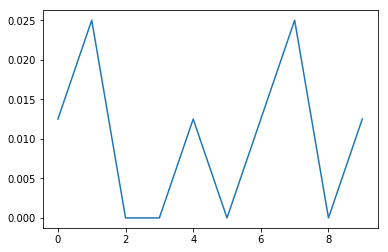

In [32]:
foodCollection=get_food_collection_from_folder("../data/1M/case_3/",10)
plt.plot(foodCollection)

In [11]:
def plot_food_action(folder,food,action,binSize,simulation_no):
    plt.figure(figsize=(20,30))
    plt.subplot(211)
    x = np.arange(food.shape[0])*binSize
    plt.plot(x,food)
    plt.title("Food count in iteration_"+str(binSize)+"_"+str(simulation_no),fontsize=20)
    plt.subplot(212)
    plot_stackPlot(pd.DataFrame(action),binSize)
    plt.title("Action distribution in iteration_"+str(binSize)+"_"+str(simulation_no),fontsize=20)
    plt.savefig(folder+"FA_"+str(binSize)+"_"+str(simulation_no)+".png")
    plt.close()

In [12]:
def plot_food_action_Distribution_from_folder(folder_data,binSize,folder_plots):
    count=0
    files = get_non_zero_files(folder_data)
    count = 0
    if not os.path.exists(folder_plots):
        os.makedirs(folder_plots)

#   For binary dat files
    data = load_pickle(folder_data+files[0])

#   For JSON files
#     with open(folder_data+files[0]) as data_file:    
#         data = json.load(data_file)
    fileName = files[0].split(".")[0]
    actions = np.array(action_count(data,binSize))
    food_total = np.array(get_foodCount(data,binSize))
    plot_food_action(folder_plots,food_total,actions,binSize,fileName)
    for file in files[1:]:
        count += 1

        data = load_pickle(folder_data+file)
        fileName = file.split(".")[0]

#         with open(folder_data+file) as data_file:    
#             data = json.load(data_file)
        
        action = np.array(action_count(data,binSize))
        food = np.array(get_foodCount(data,binSize))
        food_total += food
        actions += action
        plot_food_action(folder_plots,food,action,binSize,fileName)
        
    food_total = food_total/len(files)
    actions = actions/len(files)
    plot_food_action(folder_plots,food_total,actions,binSize,"avrage")
    
    

In [33]:
plot_food_action_Distribution_from_folder("../data/1M/case_3/",10,
                                          "../data/case_3_plots/")

In [17]:
def plot_perAgent_food_action(data,binSize,folder_plots):
    fd=np.zeros(len(data["agents"][0]["food"]))
    ind=range(0,fd.shape[0]+1,binSize)
    num_actions=np.bincount(data["agents"][0]["actions"]).shape[0]
    iter_=0
    for agent in data["agents"]:
        fd_ = np.array(agent["food"])
        food = []
        action=[]
        for j in range(len(ind)-1):
            food.append(np.sum(fd_[ind[j]:ind[j+1]]))
            arr=np.array(agent["actions"][ind[j]:ind[j+1]])
            count= np.bincount(arr)
            if num_actions != count.shape[0]:
                np.append(count,[0]*(num_actions-count.shape[0]))
            action.append(count)
        plot_food_action(folder_plots,np.array(food),action,binSize,iter_)
        iter_ += 1

In [18]:
data=load_pickle("./1M/case_0/case0_1M_1548601957_2.dat")
plot_perAgent_food_action(data,10000,"./1M/case_0_plots/case0_1M_1548601957_2/")

In [18]:
def perIter_agent_plots(folder,binSize,dump_folder):
    files = get_non_zero_files(folder)
    for i,file in enumerate(files):
        data = load_pickle(folder+file)
        #data = load_pickle(folder_data+file)
        fileName = file.split(".")[0]
        
#         with open(folder+file) as data_file:    
#             data = json.load(data_file)

    
        floder_to_store = dump_folder + fileName +"_"+str(i)
        if not os.path.exists(floder_to_store):
            os.makedirs(floder_to_store)
        plot_perAgent_food_action(data,binSize,floder_to_store+"/")
        
        
        
    

In [361]:
#perIter_agent_plots("./1M/case_2/",1000,"./1M/case_2_plots/")

In [50]:
plot_food_action_Distribution_from_folder("./Remote/case_2/",1000,"./Remote/case_2_plots/")

In [21]:
# perIter_agent_plots("./data/case_2/",1000,"./data/case_2_plots/")

In [22]:
# os.path.getsize('./data/case_2/case2_2L_17.dat')

In [23]:
#plot_food_action_Distribution_from_folder("./data/FreeRiders/",200,"./data/FreeRiders_plots/")

In [1]:
#perIter_agent_plots("./data/FreeRiders/",200,"./data/FreeRiders_plots/")

In [40]:
def get_markove(seq,binSize):
    ind = range(0,len(seq),binSize)
    markovList=[]
    num_actions = np.bincount(seq).shape[0]
    for j in range(0,len(ind)-1):
        markov=np.zeros((num_actions,num_actions))
        for i in range(ind[j],ind[j+1]):
            markov[seq[i],seq[i+1]]+=1
        markovList.append(markov.reshape(-1))
    markov=np.zeros((num_actions,num_actions))
    for i in range(len(seq)-binSize,len(seq)-1):
        markov[seq[i],seq[i+1]] += 1
    markovList.append(markov.reshape(-1))
    return(np.array(markovList))

In [41]:
def get_avragemarkov(data,binSize):
    num_actions = np.bincount(data["agents"][0]["actions"]).shape[0]
    x=len(range(0,len(data["agents"][0]["actions"]),binSize))
    markov=np.zeros((x,num_actions*num_actions))
    for agent in data["agents"]:
        markov += get_markove(agent["actions"],binSize)
    markov = markov/len(data["agents"])
    return(markov)
    

In [94]:
#data = load_pickle("./data/case_3/case3_2L_0.dat")

In [30]:
#len(get_markove(data["agents"][0]["actions"],10000))

In [42]:
def save_markove(data,binSize,folder_to_save):
    if not os.path.exists(folder_to_save):
        os.makedirs(folder_to_save)
    for i,agent in enumerate(data["agents"]):
        markove=get_markove(agent["actions"],binSize)
        df=pd.DataFrame(markove)
        df.to_csv(folder_to_save+"agent_"+str(i)+".csv",header=False,index=False)
    markov=get_avragemarkov(data,binSize)
    df=pd.DataFrame(markove)
    df.to_csv(folder_to_save+"agents_avrage"+".csv",header=False,index=False)

In [43]:
def get_qTables(data):
    q_tables={}
    for i,agent in enumerate(data["agents"]):
        q_tables[i]=qKey_parser(agent["q"],7)
    return q_tables

In [35]:
data=load_pickle("./data/case_2/case2_2L_7.dat")
q_tables = get_qTables(data)

In [104]:
save_markove(data,1000,"./data/case_3_markove_data/simulation8/")

In [151]:
data = load_pickle("./data/case_2/case2_2L_7.dat")
save_markove(data,1000,"./data/case_2_markove_data/simulation_7/")

In [177]:
data = load_pickle("./data/case_1/case1_2L_5.dat")
plot_perAgent_food_action(data,1000,"test/")

In [178]:
data = load_pickle("./data/case_1/case1_2L_5.dat")
save_markove(data,1000,"./data/case_1_markove_data/simulation_5/")

In [44]:
def get_data_chunk(data,from_,to):
    chunkData={"agents":[]}
    for i,agent in enumerate(range(data["agents"])):
        chunkData["agents"].append({"food":agent[food[from_:to]],
                                    "actions":agent[food[from_:to]]})
    return(chunkData)

In [50]:
def agent_food_plot(data,binSize,filename):
    fd=np.zeros(len(data["agents"][0]["food"]))
    ind=range(0,fd.shape[0]+1,binSize)
    iter_=0
    plt.figure(figsize=(50,20))
    for i,agent in enumerate(data["agents"]):
        fd_ = np.array(agent["food"])
        food = []
        for j in range(len(ind)-1):
            food.append(np.sum(fd_[ind[j]:ind[j+1]]))
        x = np.arange(len(food))*binSize
       # plt.subplot(10,1,i+1)
        plt.plot(x,food,label="agnet"+str(i))
    plt.title("Food count in iteration_"+str(binSize)+"_"+str(i),fontsize=20)
    plt.legend()
    plt.savefig(filename)
    plt.close()
    


In [52]:
data = load_pickle("./Local/case_1/case1_2L_0.dat")
agent_food_plot(data,1000,"./Local/fig.png")

In [49]:
def folder_agent_food_plot(folder_from_data,binSize,folder_to_save):
    files = get_non_zero_files(folder_from_data)
    if not os.path.exists(folder_to_save):
        os.makedirs(folder_to_save)
    for file in files:
        file_to_save=file.split('.')[0]+".png"
        data = load_pickle(folder_from_data+file)
        agent_food_plot(data,binSize,folder_to_save+"/"+file_to_save)

In [62]:
folder_agent_food_plot("./Local/case_0/",1000,"./Local/case_0_plots/food_plots")

In [281]:
def plot_all_action_distribution(data,binSize,file_to_save):
    ac=np.zeros(len(data["agents"][0]["actions"]))
    ind=range(0,ac.shape[0]+1,binSize)
    num_actions=np.bincount(data["agents"][0]["actions"]).shape[0]
    plt.figure(figsize=(7,20))
    y=0.845
    
    for i,agent in enumerate(data["agents"]):
        action=[]
        for j in range(len(ind)-1):
            arr=np.array(agent["actions"][ind[j]:ind[j+1]])
            count= np.bincount(arr)
            if num_actions != count.shape[0]:
                np.append(count,[0]*(num_actions-count.shape[0]))
            action.append(count)
        ax = plt.subplot(10,1,i+1)
        if i != 9:
            plt.axis('off')
            plot_stackPlot(pd.DataFrame(action),binSize,False)
        else:
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.yaxis.set_major_locator(plt.NullLocator())
           # ax.set_xticklabels(ax1_y, fontsize=15)
#             for tick in ax.xaxis.get_major_ticks():
#                 tick.label.set_fontsize(50)
            plt.xlabel("Simulation time steps")
            plot_stackPlot(pd.DataFrame(action),binSize,True)
        plt.text(0.12, y, "Agent "+str(i+1), transform=plt.gcf().transFigure,rotation=90)
        y=y-.075
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(file_to_save)
  #  plt.close()        

In [221]:
data=load_pickle("./2L/case_2/case2_2L_7.dat")
plot_all_action_distribution(data,1000,"./2L/case_2_plots/totalactions.png")

In [233]:
def plot_food(data,binSize):
    plt.plot(get_foodCount(data,binSize))
    plt.xlabel("Simulation time steps")
    plt.ylabel("Food count per agent for 1000 time steps")
    

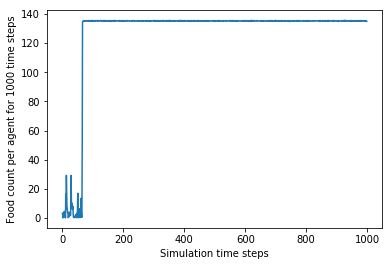

In [234]:
plot_food(data,1000)

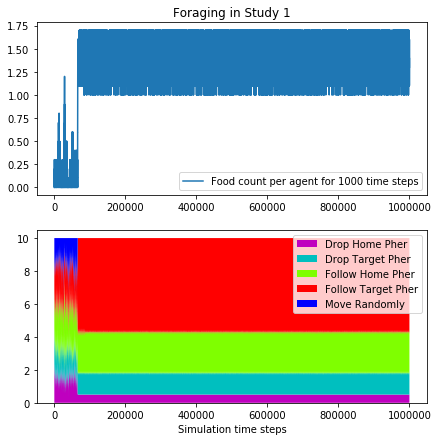

In [20]:
plt.figure(figsize=(7,7))
data = load_pickle("./Study 1.dat")
binSize =10
food=np.array(get_foodCount(data,binSize))
action = action_count(data,binSize)

plt.subplot(211)
x = np.arange(food.shape[0])*binSize
plt.plot(x,food,label="Food count per agent for 1000 time steps")
plt.legend()
plt.title("Foraging in Study 1")
plt.subplot(212)
plot_stackPlot(pd.DataFrame(action),binSize,False)
plt.title("")
plt.xlabel("Simulation time steps")
plt.legend()
plt.savefig("Figure_4.png")
#plt.close()

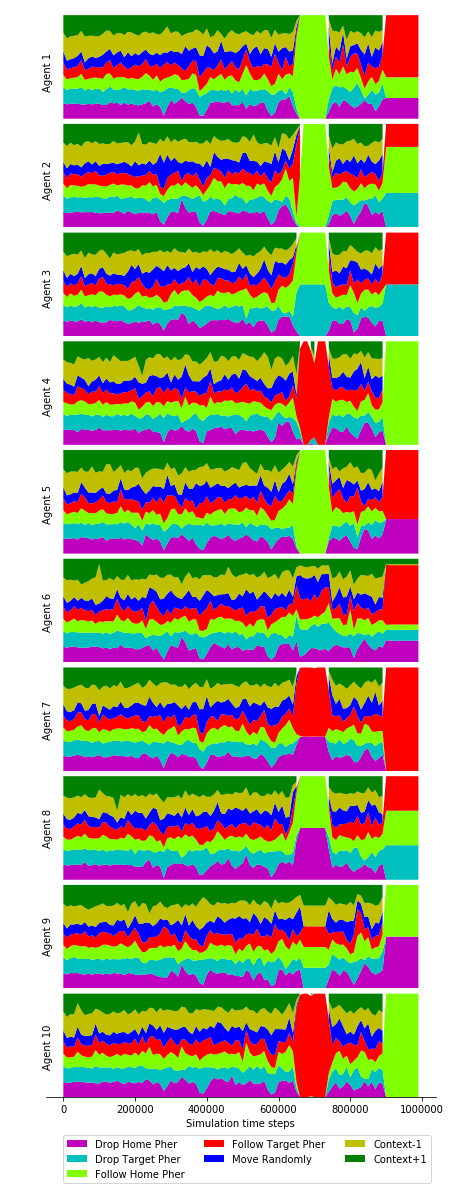

In [319]:
data=load_pickle("./case2_1M_1548490708_5.dat")
plot_all_action_distribution(data,10000,"./case2_1M_1548490708_5.png")

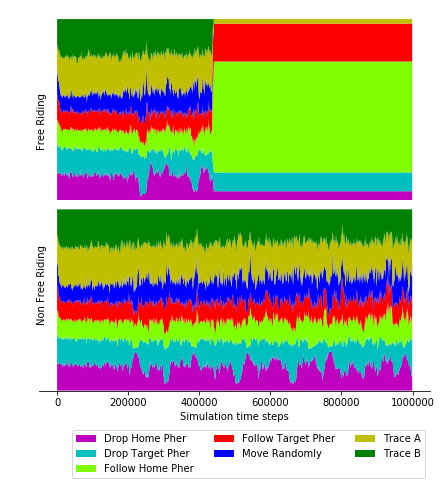

In [22]:
data1 = load_pickle("Study 4_1.dat")
data2 = load_pickle("Study 4_2.dat")
binSize = 1000

plt.figure(figsize=(7,7))
action = action_count(data1,binSize)

plt.subplot(211)
plt.axis('off')
plot_stackPlot(pd.DataFrame(action),binSize,False)

ax=plt.subplot(212)
action = action_count(data2,binSize)
plot_stackPlot(pd.DataFrame(action),binSize,False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.set_major_locator(plt.NullLocator())
plt.xlabel("Simulation time steps")
plt.text(0.12, 0.7, "Free Riding", transform=plt.gcf().transFigure,rotation=90)
plt.text(0.12, 0.4, "Non Free Riding", transform=plt.gcf().transFigure,rotation=90)
plt.legend(bbox_to_anchor=(1, -0.18),loc=0,ncol=3)
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("Figure_6.png")

In [ ]:
def is_agent_freeRaider(data,binSize):
    ac=np.zeros(len(data["agents"][0]["actions"]))
    ind=range(0,ac.shape[0]+1,binSize)
    num_actions = np.bincount(data["agents"][0]["actions"]).shape[0]
    for i,agent in enumerate(data["agents"]):
        action=[]
        for j in range(len(ind)-1):
            arr=np.array(agent["actions"][ind[j]:ind[j+1]])
            count= np.bincount(arr)
            if num_actions != count.shape[0]:
                np.append(count,[0]*(num_actions-count.shape[0]))
            action.append(count)

In [463]:
def test_unique(arr):
    vals=np.unique(arr)
    if vals.shape[0] == 1:
        return True
    else:
        return False

def seprate_free_rider_food_count(data,binSize,trainingIter):
    food_free_rider = []
    food_non_free_rider = []
    total_food=get_foodCount(data,binSize)
    total_food=total_food[int(trainingIter/binSize):]
    actions= np.array([agent["actions"] for agent in data["agents"]])
    actions = actions.T # no need
    actions = actions[trainingIter:]
   # print(actions.shape,len(total_food.shape)
    ind=np.arange(trainingIter,actions.shape[0]+1,binSize)
    for i in range(ind.shape[0]-1):
        is_free_rider=any(np.apply_along_axis(test_unique,0,actions[ind[i]:ind[i+1]])==True)
        if(is_free_rider):
            food_free_rider.append(total_food[i])
        else:
            food_non_free_rider.append(total_food[i])
    return(food_free_rider,food_non_free_rider)

In [466]:
import gc

def get_FR_WKR_data(folder,binSize,trainingIter):
    freee_rider=[]
    worker=[]
    files = get_non_zero_files(folder)
    for i,file in enumerate(files):
        data = load_pickle(folder+file)
        fr_wr_food=seprate_free_rider_food_count(data,binSize,trainingIter)
        freee_rider.extend(fr_wr_food[0])
        worker.extend(fr_wr_food[1])
        gc.collect()
    mn_fr=np.array(freee_rider).mean()
    std_fr=np.array(freee_rider).std()
    mn_wkr=np.array(worker).mean()
    std_wkr=np.array(worker).std()
    return({"FRDR":(mn_fr,std_fr),"WKR":(mn_wkr,std_wkr)})
#     return(freee_rider,worker)
    

In [493]:
# gc.collect()
# study1=get_FR_WKR_data("./1M/1M/case_0/",1000,20000)
gc.collect()
study2=get_FR_WKR_data("./data/Study 2/",1000,20000)
gc.collect()
study3=get_FR_WKR_data("./data/Study 3/",1000,20000)
gc.collect()
study4=get_FR_WKR_data("./data/Study 4/",1000,20000)
gc.collect()

0

In [487]:
meanFr=[]
stdFr=[]
meanWkr=[]
stdWkr=[]


In [495]:
# freee_rider = study1[0]
# worker = study1[1]
# mn_fr=np.mean(np.array(freee_rider))
# std_fr=np.array(freee_rider).std()
# mn_wkr=np.mean(np.array(worker))
# std_wkr=np.array(worker).std()
# meanFr.append(mn_fr)
# meanWkr.append(mn_wkr)
# stdFr.append(std_fr)
# stdWkr.append(std_wkr)

# freee_rider = study2[0]
# worker = study2[1]
# mn_fr=np.array(freee_rider).mean()
# std_fr=np.array(freee_rider).std()
# mn_wkr=np.array(worker).mean()
# std_wkr=np.array(worker).std()
# meanFr.append(mn_fr)
# meanWkr.append(mn_wkr)
# stdFr.append(std_fr)
# stdWkr.append(std_wkr)


# freee_rider = study3[0]
# worker = study3[1]
# mn_fr=np.array(freee_rider).mean()
# std_fr=np.array(freee_rider).std()
# mn_wkr=np.array(worker).mean()
# std_wkr=np.array(worker).std()
# meanFr.append(mn_fr)
# meanWkr.append(mn_wkr)
# stdFr.append(std_fr)
# stdWkr.append(std_wkr)

# freee_rider = study4[0]
# worker = study4[1]
# mn_fr=np.array(freee_rider).mean()
# std_fr=np.array(freee_rider).std()
# mn_wkr=np.array(worker).mean()
# std_wkr=np.array(worker).std()
# meanFr.append(mn_fr)
# meanWkr.append(mn_wkr)
# stdFr.append(std_fr)
# stdWkr.append(std_wkr)

In [498]:
def check_if_freeRider(data,binSize,trainingIter):
    food_free_rider = []
    food_non_free_rider = []
    total_food=get_foodCount(data,binSize)
    total_food=total_food[int(trainingIter/binSize):]
    actions= np.array([agent["actions"] for agent in data["agents"]])
    actions = actions.T # no need
    actions = actions[trainingIter:]
    #print(actions.shape,len(total_food))
    ind=np.arange(trainingIter,actions.shape[0]+1,binSize)
    for i in range(ind.shape[0]-1):
        is_free_rider=any(np.apply_along_axis(test_unique,0,actions[ind[i]:ind[i+1]])==True)
        if(is_free_rider):
            return True
    return False


def check_free_riders_in_folder(folder,binSize,trainingIter):
    freee_riders={}
    files = get_non_zero_files(folder)
    for i,file in enumerate(files):
        data = load_pickle(folder+file)
        freee_riders[file]=check_if_freeRider(data,binSize,trainingIter)
    return(freee_riders)

In [504]:
study2_frCount=check_free_riders_in_folder("./data/Study 2/",10000,20000)
study3_frCount=check_free_riders_in_folder("./data/Study 3/",10000,20000)
study4_frCount=check_free_riders_in_folder("./data/Study 4/",10000,20000)


In [518]:
#study2_frCount=pd.DataFrame(study2_frCount,index=[0]).T
study3_df = pd.DataFrame(study3_frCount,index=[0]).T
study4_df = pd.DataFrame(study4_frCount,index=[0]).T

In [519]:
np.sum(study2_frCount[0]),np.sum(study3_df[0]),np.sum(study4_df[0])

(57, 55, 29)

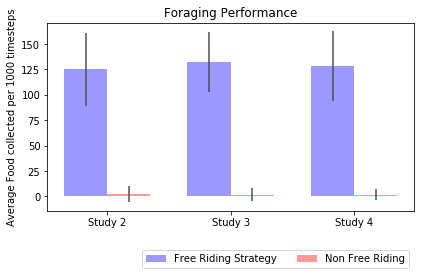

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 3

free_rider_mn = (124.99384545247321, 132.3008835439931, 128.408133221967)#(study2["FRDR"][0],study3["FRDR"][0],study4["FRDR"][0])
free_rider_std = (35.57433147524303, 29.882738665462014, 34.21235411345352)#( study2["FRDR"][1],study3["FRDR"][1],study4["FRDR"][1])

worker_mn = (2.427735430581757, 1.761161656394561, 1.6390537131748861)#(study2["WKR"][0],study3["WKR"][0],study4["WKR"][0])
worker_std = (8.256375719736228, 6.056237809962225, 5.414789590353413)#(study2["WKR"][1],study3["WKR"][1],study4["WKR"][1])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, free_rider_mn, bar_width,
                alpha=opacity, color='b',
                yerr=free_rider_std, error_kw=error_config,
                label='Free Riding Strategy')

rects2 = ax.bar(index + bar_width, worker_mn, bar_width,
                alpha=opacity, color='r',
                yerr=worker_std, error_kw=error_config,
                label='Non Free Riding')

ax.set_ylabel('Average Food collected per 1000 timesteps')
ax.set_title('Foraging Performance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Study 2', 'Study 3', 'Study 4', 'Study 1', 'Study 5'))
ax.legend(bbox_to_anchor=(1, -0.18),loc=0,ncol=2)

fig.tight_layout()
plt.show()

In [499]:
free_rider_mn

(124.99384545247321, 132.3008835439931, 128.408133221967)

In [500]:
free_rider_std

(35.57433147524303, 29.882738665462014, 34.21235411345352)

In [501]:
worker_mn

(2.427735430581757, 1.761161656394561, 1.6390537131748861)

In [502]:
worker_std

(8.256375719736228, 6.056237809962225, 5.414789590353413)

In [503]:
pd.DataFrame([free_rider_mn,free_rider_std,worker_mn,worker_std])

,0,1,2
0,124.993845,132.300884,128.408133
1,35.574331,29.882739,34.212354
2,2.427735,1.761162,1.639054
3,8.256376,6.056238,5.414790
